#Machine Learning Course Assignment#

*Prof: Ladle Patel*

*Student: Pietro Barizza*

*Case study 3: Predicting Credit Default Risk using Logistic Regression & Decision*


**Objective**

As a financial analyst at a lending institution, your job is to predict whether a loan applicant is likely to default on credit based on historical data. You will compare two
classification algorithms:
* Logistic Regression
* Decision Tree Classifier


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load dataset from github
df = pd.read_csv('https://raw.githubusercontent.com/pbarizza/ML-course-2025/refs/heads/main/assignment/GiveMeSomeCredit-training.csv')

##Understanding the Dataset##

Q1. Load the dataset and display the first few rows.

In [ ]:
# explore the dataset
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
df.shape

(150000, 12)

In [ ]:
df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

Q2. What does each column represent? Which one is the target variable?

In [ ]:
df.dtypes

,0
Unnamed: 0,int64
SeriousDlqin2yrs,int64
RevolvingUtilizationOfUnsecuredLines,float64
age,int64
NumberOfTime30-59DaysPastDueNotWorse,int64
DebtRatio,float64
MonthlyIncome,float64
NumberOfOpenCreditLinesAndLoans,int64
NumberOfTimes90DaysLate,int64
NumberRealEstateLoansOrLines,int64


The target variable is  'SeriousDlqin2yrs', which takes values False/True (0/1).

* 'Unnamed: 0',                          --> this is an index, probably autogenerated
* 'RevolvingUtilizationOfUnsecuredLines' --> % of the balance on lines of credit
* 'age'                                  --> the age of the borrower
* 'NumberOfTime30-59DaysPastDueNotWorse' --> times of past due > 30-59 days in the last two years
* 'DebtRatio'                            --> monthly payments / gross income
* 'MonthlyIncome'                        --> monthly income
* 'NumberOfOpenCreditLinesAndLoans'      --> nos open loans
* 'NumberOfTimes90DaysLate'              --> time of past dues > 90 days
* 'NumberRealEstateLoansOrLines'         --> nos mortgage / real estates credit lines
* 'NumberOfTime60-89DaysPastDueNotWorse' --> nos of past dues > 60-89 days in the last two years
* 'NumberOfDependents'                   --> nos family members excluing themselves
       

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [ ]:
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Q3. How many default and non-default cases are there? (Use value_counts())

In [ ]:
# number of default cases
df['SeriousDlqin2yrs'].value_counts()

,count
SeriousDlqin2yrs,
0,139974
1,10026


there are 10026 case default cases. This is given by SeriousDlqin2yrs == True.

##Data Cleaning and Preprocessing##

Q4. Are there any missing values? Which features have the most?

In [ ]:
# getting missing values
df.isnull().sum()

,0
Unnamed: 0,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,29731
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0


MonthlyIncome and NumberOfDependents have missing values. the rest are all ok.
MonthlyIncome has the highest amount of missing values with 29731 hit. followed by NumberOfDependents with 3924.

Q5. What strategy will you use to handle missing values? Apply it.


In [ ]:
# check the entity of missing values
missing_values = (df.isnull().sum() / len(df)) * 100
missing_values[missing_values > 0].round(2)

,0
MonthlyIncome,19.82
NumberOfDependents,2.62


In [ ]:
df['MonthlyIncome'].median()

5400.0

In [ ]:
df['NumberOfDependents'].median()

0.0

In [ ]:
# apply median to both features
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())
df['NumberOfDependents'] = df['NumberOfDependents'].fillna(df['NumberOfDependents'].median())

The best strategy to the missing values is
* MonthlyIncome: use the mediam
* MonthlyIncome: use the mediam or eventually set to 0, since the median indicate it is 0.

Median is more robust to outliers than mean. Using mean would risk to skew data.


In [ ]:
# check if all missing value have been filled
df.isnull().sum()

,0
Unnamed: 0,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,0
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0


Q6. Drop any redundant columns. Which ones did you drop and why?

In [ ]:
# drop the redundant column
df.drop(columns=['Unnamed: 0'], inplace=True)

The only column worthy to be dropped is 'Unnamed: 0'. All other are significant for the the prediction.

Q7. Check for class imbalance in the target variable. How will you address it?

In [ ]:
# check the total value of the target variable
print("Class Distribution (Absolute values):")
print(df['SeriousDlqin2yrs'].value_counts())

# get the percentage of False and True against the Total (using the normalize=True, parameter)
print("\nClass Imbalance (Percentages):")
print(df['SeriousDlqin2yrs'].value_counts(normalize=True) * 100)

Class Distribution (Absolute values):
SeriousDlqin2yrs
0    139974
1     10026
Name: count, dtype: int64

Class Imbalance (Percentages):
SeriousDlqin2yrs
0    93.316
1     6.684
Name: proportion, dtype: float64


In [ ]:
a,b = df['SeriousDlqin2yrs'].value_counts()
ratio = round(a / b)
print(f"Class ratio (non-default : default) ≈ 1:{ratio}")

Class ratio (non-default : default) ≈ 1:14


This means a defaulter every 14 borrowers.

Indeed the Target variable is highly imbalanced (6.684% of defaulters), which is expected. This imbalance may create bias towards the majority class (non-defaulter). To avoid this we may adoptht the class_weight='balanced' paramters in both Logistic Regression and Decision Tree

* model_lr = LogisticRegression(class_weight='balanced', random_state=42)
* model_dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)

class_weight='balanced' calculate the weights in this way:

* weight_for_class_0 = total_samples / (2 * non_default_samples)
* weight_for_class_1 = total_samples / (2 * default_samples)

the weights for the default samples will be much higher, reducing the bias towards class 0.

In [ ]:
# simulate the weights
print(150000/(2*10026))
print(150000/(2*139974))

# the class 0 will have 7.5 time more weight with the parameter class_weight='balanced', reducing the bias


7.480550568521843
0.5358137939903125


##Feature Selection and Encoding##

Q8. Select key features that could impact credit default (e.g.,
RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome, etc.)

In [ ]:
target = 'SeriousDlqin2yrs'
features = [col for col in df.columns if col != target]
X = df[features]
y = df[target]
X

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
149995,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0.246044,58,0,3870.000000,5400.0,18,0,1,0,0.0
149998,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [ ]:
y

,SeriousDlqin2yrs
0,1
1,0
2,0
3,0
4,0
...,...
149995,0
149996,0
149997,0
149998,0


Q9. If any features are categorical, encode them accordingly.


There are no categorical variables.

Q10. Scale the features using StandardScaler. Why is this important?

In [ ]:
# import library
from sklearn.preprocessing import StandardScaler
# instanciate the class StandardScaler
scaler = StandardScaler()

# fit and transform the features
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

# no need to scale y since it is categorical
X_scaled.sample(5)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
6661,-0.024218,0.860070,-0.100419,-0.173209,0.090342,-0.087984,-0.063793,-0.901283,-0.057852,-0.666126
68495,-0.022785,0.115409,-0.100419,1.486887,-0.079009,-0.670969,-0.063793,0.868993,-0.057852,-0.666126
19785,-0.022215,0.995463,-0.100419,-0.173036,-0.110040,0.106344,-0.063793,0.868993,-0.057852,0.237202
70945,-0.021418,-0.832342,-0.100419,-0.173002,0.563332,0.300672,-0.063793,0.868993,-0.057852,2.043858
111927,-0.018346,-0.696949,0.853605,-0.173048,-0.313681,-0.476640,1.135452,-0.901283,-0.057852,2.043858


##Train-Test Split##

Q11. Split the dataset into train and test sets (80/20 split).


In [ ]:
# import library
from sklearn.model_selection import train_test_split

# split the data into 80/20
# stratify=y is used to maintain the class distribution
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


Q12. Print the shape of the train and test datasets.

In [ ]:
# get the shape of the split datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120000, 10), (30000, 10), (120000,), (30000,))

##Modeling and Evaluation##

Q13. Train a Logistic Regression model.


In [ ]:
# import library
from sklearn.linear_model import LogisticRegression

# logist regression
# class_weight='balanced' addreses the imbalancy of the dataset
model_lr = LogisticRegression(class_weight='balanced', random_state=42)

# fit the model
model_lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

Q14. Train a Decision Tree Classifier with max_depth=5.


In [ ]:
# import library
from sklearn.tree import DecisionTreeClassifier

# decision tree
# class_weight='balanced' addreses the imbalancy of the dataset
# max_depth=5 max depth
# note we are using scaled data. this should not be a problem, even if it doesn't affect the tree since there are no gradients involved.
model_dt = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)

# fit the model
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [ ]:
# logistic regression predictons
y_pred_lr = model_lr.predict(X_test)
y_proba_lr = model_lr.predict_proba(X_test)[:, 1]

In [ ]:
# decision tree predictons
y_pred_dt = model_dt.predict(X_test)
y_proba_dt = model_dt.predict_proba(X_test)[:, 1]

Q15. Evaluate both models using:
* Accuracy
* Confusion Matrix
* Precision, Recall, F1-Score
* ROC AUC Score

Which model performs better for identifying default risk?

In [ ]:
# import library
from sklearn.metrics import accuracy_score

acc_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {acc_lr:.4f}')

Logistic Regression Accuracy: 0.7765


Logistic Regression Confusion Matrix:
[[21953  6042]
 [  663  1342]]


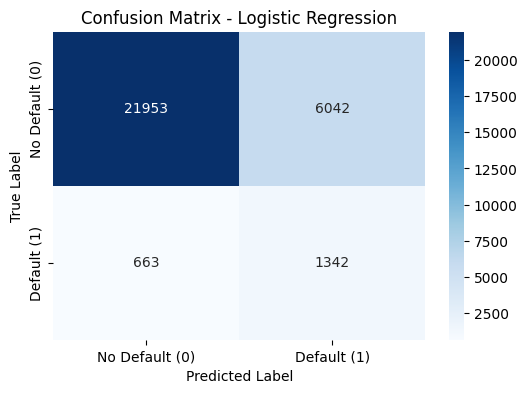

In [ ]:
# import library
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Logistic Regression Confusion Matrix:")
print(cm_lr)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default (0)', 'Default (1)'],
            yticklabels=['No Default (0)', 'Default (1)'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print('Logistic Regression Classification Report:')
print(classification_report(y_test, y_pred_lr, target_names=['No Default', 'Default']))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

  No Default       0.97      0.78      0.87     27995
     Default       0.18      0.67      0.29      2005

    accuracy                           0.78     30000
   macro avg       0.58      0.73      0.58     30000
weighted avg       0.92      0.78      0.83     30000



In [ ]:
from sklearn.metrics import roc_auc_score

auc_lr = roc_auc_score(y_test, y_proba_lr)
print(f'Logistic Regression ROC AUC: {auc_lr:.4f}')

Logistic Regression ROC AUC: 0.8022


In [ ]:
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {acc_dt:.4f}")

Decision Tree Accuracy: 0.7594


Decision Tree Confusion Matrix:
[[21177  6818]
 [  401  1604]]


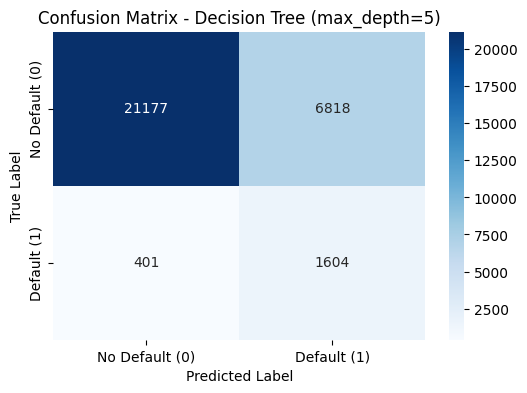

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:")
print(cm_dt)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default (0)', 'Default (1)'],
            yticklabels=['No Default (0)', 'Default (1)'])
plt.title('Confusion Matrix - Decision Tree (max_depth=5)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
print('Decision Tree Classification Report:')
print(classification_report(y_test, y_pred_dt, target_names=['No Default', 'Default']))

Decision Tree Classification Report:
              precision    recall  f1-score   support

  No Default       0.98      0.76      0.85     27995
     Default       0.19      0.80      0.31      2005

    accuracy                           0.76     30000
   macro avg       0.59      0.78      0.58     30000
weighted avg       0.93      0.76      0.82     30000



In [ ]:
auc_dt = roc_auc_score(y_test, y_proba_dt)
print(f'Decision Tree ROC AUC: {auc_dt:.4f}')

Decision Tree ROC AUC: 0.8480


In [ ]:
# Logistic Regression
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)

# Decision Tree
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_proba_dt)

# compare the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'],
    'Logistic Regression': [acc_lr, prec_lr, rec_lr, f1_lr, auc_lr],
    'Decision Tree': [acc_dt, prec_dt, rec_dt, f1_dt, auc_dt]
})


metrics_df

,Metric,Logistic Regression,Decision Tree
0,Accuracy,0.776500,0.759367
1,Precision,0.181744,0.190454
2,Recall,0.669327,0.800000
3,F1-Score,0.285866,0.307663
4,ROC AUC,0.802206,0.848043


In [ ]:
# logistic regression confusion matrix data
tn_lr, fp_lr, fn_lr, tp_lr = cm_lr.ravel()

# decision tree confusion matrix data
tn_dt, fp_dt, fn_dt, tp_dt = cm_dt.ravel()

# comparison
confusion_matrix_df = pd.DataFrame({
    'Metric': ['True Negatives (TN)', 'False Positives (FP)', 'False Negatives (FN)', 'True Positives (TP)'],
    'Logistic Regression': [tn_lr, fp_lr, fn_lr, tp_lr],
    'Decision Tree': [tn_dt, fp_dt, fn_dt, tp_dt]
})

confusion_matrix_df

,Metric,Logistic Regression,Decision Tree
0,True Negatives (TN),21953,21177
1,False Positives (FP),6042,6818
2,False Negatives (FN),663,401
3,True Positives (TP),1342,1604


*   TP: (correctly identified defaulters)
    *   Decision Tree  (1604) >  Logistic Regression (1342). Decision Tree is better at identifying actual defaulters.

*   (TN): (correctly identified non-defaulters)
    *   Logistic Regression (21953) >  Decision Tree (21177). Logistic Regression is better at identifying actual non-defaulters.

*   FP:  (identified non-defaulters as defaulters meaning a miss for the bank)
    *   Logistic Regression (6042) < (6818). Logistic Regression performs better

*   FN: (miss defaulters) This is a significant risk for the bank,
    *   Decision Tree (401) < Logistic Regression (663). Decision Tree is better at avoiding this costly error.

**Conclusion:**

In the context of credit risk, minimizing False Negatives (lending to a defaulter) is often more critical than minimizing FPs (denying a loan to a non-defaulter).

Decision Tree, despite having more FPs and slightly lower overall accuracy, might be the preferred model.
It has better ability to identify potential defaulters (higher Recall and fewer FNs).

The higher ROC AUC for the Decision Tree shows it performs better in distinguishing between the two classes.

##Visualization and Interpretation##

Q16. Plot the Confusion Matrix for both models. What does it indicate?




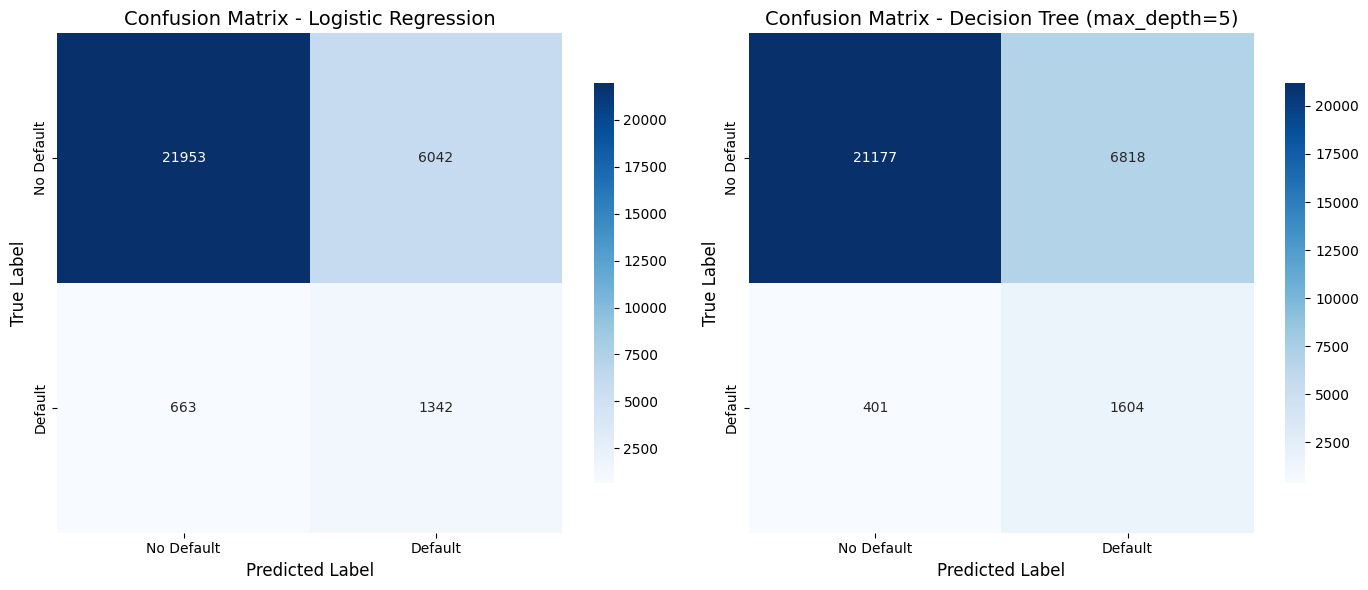

In [ ]:
#  confusion matrices
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_dt = confusion_matrix(y_test, y_pred_dt)

# side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Logistic Regression
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'],
            ax=ax1, cbar_kws={'shrink': 0.8})
ax1.set_title('Confusion Matrix - Logistic Regression', fontsize=14)
ax1.set_ylabel('True Label', fontsize=12)
ax1.set_xlabel('Predicted Label', fontsize=12)

# Decision Tree
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'],
            ax=ax2, cbar_kws={'shrink': 0.8})
ax2.set_title('Confusion Matrix - Decision Tree (max_depth=5)', fontsize=14)
ax2.set_ylabel('True Label', fontsize=12)
ax2.set_xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

FN: (miss defaulters) This is a significant risk for the bank,

Decision Tree (401) < Logistic Regression (663). Decision Tree is better at avoiding this costly error.

Q17. Plot the ROC Curve for both models. Which has the higher AUC?

/tmp/ipython-input-3545894916.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.500)', color='gray')


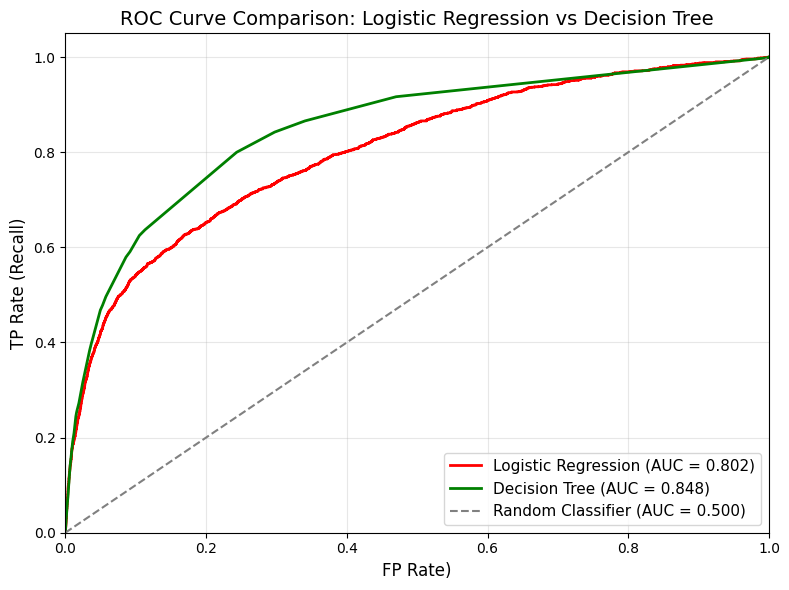

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC / AUC curve LR
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)

# ROC / AUC curve DT
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
auc_dt = roc_auc_score(y_test, y_proba_dt)

# plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})', color='red', linewidth=2)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.3f})', color='green', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.500)', color='gray')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Rate)', fontsize=12)
plt.ylabel('TP Rate (Recall)', fontsize=12)
plt.title('ROC Curve Comparison: Logistic Regression vs Decision Tree', fontsize=14)
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

The higher ROC AUC for the Decision Tree shows it performs better in distinguishing between the two classes.

Q18. Print the feature importances from the Decision Tree. Which features most
influence default risk?

In [ ]:
# get feature importances
feature_importances = model_dt.feature_importances_

# create dataframe
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# sort descending
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
0,RevolvingUtilizationOfUnsecuredLines,0.584746
2,NumberOfTime30-59DaysPastDueNotWorse,0.185088
6,NumberOfTimes90DaysLate,0.161344
8,NumberOfTime60-89DaysPastDueNotWorse,0.058830
1,age,0.008855
3,DebtRatio,0.000858
4,MonthlyIncome,0.000278
5,NumberOfOpenCreditLinesAndLoans,0.000000
7,NumberRealEstateLoansOrLines,0.000000
9,NumberOfDependents,0.000000


The features that most influence default risk are:

* RevolvingUtilizationOfUnsecuredLines: -->      0.5847
* NumberOfTime30-59DaysPastDueNotWorse: -->     0.1851
* NumberOfTimes90DaysLate:              -->     0.1613
* NumberOfTime60-89DaysPastDueNotWorse: -->     0.0588


##Business Interpretation##

In [ ]:
Q19. What kind of borrowers are most likely to default, based on the analysis?


The profile of the defaulter seems to be a person who has an high part of his income in line of credit and had a past history of not met payment obligation within the last two years.

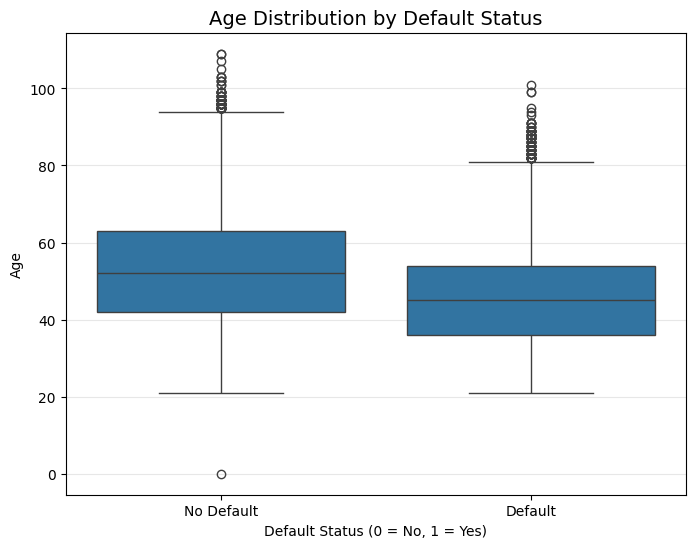

In [ ]:
# age vs defaul correlation
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='SeriousDlqin2yrs', y='age')
plt.title('Age Distribution by Default Status', fontsize=14)
plt.xlabel('Default Status (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.grid(True, axis='y', alpha=0.3)
plt.show()

The median age of the defaulter is lower and indicates that youger people are more likely to default.

Q20. How can the lending institution reduce default rates based on these insights?

Based on the insights of the analysis the lending institution can
1. implement tighter policies to reduce the number new high risk loan.
2. implement collection policies to recover the credit
3. monitor high risk loan to detect defaults in time
4. implement a more robust credit risk algorithm able to reduce the false negatives.